## Technical Test from Snitch AI
#### by David Torres
---

### Scenario
The objective here is to have a better idea of how you approach problems faced every day by the Snitch AI team. 

Approach it like if you were part of the team tasked to solve that problem. We want to see your mind at work! The answer’s format is up to you. Make sure it clearly conveys your approach, ideas, techniques, and implementation. For example, you could 

    • Re-state the problem in your own words.
    • Describe the pertinence of the problem.
    • Describe different approaches that could solve the problem.
    • Write a quick Python implementation.
    • Describe how you would validate that your approach solves the problem.
    • Write some unit tests that would assure the robustness of the approach.
    • Elaborate on possible improvements to your solution and its implementation.
    • Sketch how the results of the implementation would be displayed to end-users.
    • Write a guide on how users can improve their model following a negative test result (i.e., recommendations for users to improve their model, related to the scenario).

### Building a new functionality for Snitch AI
End users want to know if their model learned generalizable predictive patterns (i.e., they did not overfit their model on their training data). 

You are in charge of leading the implementation, from A to Z, of that new functionality.

Given an already trained model, its training dataset, and a testing dataset:

    • How would you assess if a model is overfitted?
      (Try going beyond the trivial "let's look if the testing performance is significantly worse than the training performance")
    • Are there any other distinctive behaviors exhibited by overfitted models?
    • How can you detect those behaviors?
    • How you would like to implement it?

---

### 1. Re-stating the problem in my own words and the pertinence of it

The current Machine Learning (ML) and Deep Learning (DL) models demonstrate a great capacity to adapt and adjust to any type of problem, the solutions offered by these models easily surpass the human brain executing certain types of tasks (Human 0 - Machines 1). However, there are limitations that must be considered when putting a model into practice.

Perhaps the greatest limitation is the impossibility of adapting to new scenarios (data) never seen before by a model, Ex: the Covid pandemic surely affected several investment models based on AI since this type of behaviour and information was never foreseen by the models; In this scenario, the human brain is highly creative and adaptable to new circumstances or situations (Human 1 - Machines 1).

Guaranteeing the performance of our AI models after being trained to react to real scenarios depends on the quality of the information used during model training and the depth of model training. It is easy to fall into a fallacy and assume that our models show optimal performance during a test if the correct validations have not been performed and fall into overfitting. *We cannot trust the machines yet, not without a relevant validation* 😉

So, that said, it would be interesting to explore a general and implementable solution that allows us to identify if a model has or will have a good response to new data.

🤖 Machines still have a long way to go by humans.

### 2. Describing different approaches that could solve the problem

To understand possible scenarios that lead to the overfitting problem let's make a list:

        • The training data does not represent a real scenario.
        • The training data have scenarios that will never occur.
        • The data selection does not have a similar distribution between testing and training sets.
        • Unbalanced data, possible misinterpretation of metrics.
        • Leaked data correlated with the target variables.
        • Over-trained model.
        • Excess of complexity.
        • No regularization.
        • Model and data degradation.
        • Others ...
       
Generalizing the origin of overfitting can be due to the data and the model or the model itself. If the data is not general enough to represent reality, the model will end up overfitting the training data, or, if we over-train the model this will lost the capacity to understanding generable patterns.

So, how can we identify overfitting?

    • Well... be simple, "the performance of the model in new data does not reflect the expected result, it is usually worse." ... In reality, we can not wait for this to happen, it would be an economic disgrace. This topic is still largely open.
    
### Let's Brainstorming!    
    
Here some interesting ideas and questions to board this problem beyond the usual:

    • How could we anticipate a scenario where overfitting will occur?
        • Data validation: Before starting the validation for the model, it seems pertinent to start validation of the data itself. That is, to validate if the origin of the distributions of the training and test data is the same. A Kolmogórov-Smirnov test should be sufficient to measure the risk of overfitting or something similar. Also, consider validating if testing data is good through a sanity check where are not duplicates with the training set.
        • Data augmentation and testing: Generate virtual scenarios based on preceding data to simulate data that the model has never seen and test performance.
        • Resampling the test data: Explore the performance of the model by different subsets from the test data exploring sensibility.
        • Explore decision boundary plots: Examining predictive area looking for complex patterns.
        • Identify data leakages: Explore data from the training and test set looking for patterns that a model can use to achieve high targets, find for high correlations. We can discover this leaked information adding some random noise or shuffling the information by feature exploring sensibility of performance.

    • How can we create a model that identifies overfitted models?
      Well, If we are able to create a model that is able to identify if a prediction comes from the training or testing set, surely we will found when a model is overfitting, so, a classification model can be constructed using targets and predicted variables. Consider also a sanity check for the distribution of predictions and targets, this could be useful to identify scenarios where the model is weak on predictions and tends to overfit. A model that identifies complex changes in decision boundaries could works also as a solution.
      Among the craziest and most complex ideas that I thought, it could perhaps create two adversarial models to generate testing data and discriminate with training data classifying the origin of the data. The testing data could be used as a latent space of the generator.      

### 3. A quick Python implementation

Some of my brainstorming ideas will be tested in the following cells:

I love pycaret library due to its simplicity, so to install it do

```pip install pycaret[full]```

Often, I listen that pycaret trends to overfitting, so let's explore it.

In [45]:
import pycaret.regression as rg
import pycaret.classification as cl
from pycaret.datasets import get_data

from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd

import scipy.stats as st
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [9]:
# Explore datasets on pycaret
df_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [10]:
# Pycaret counts with several datasets, we can start with some regression dataset
dataset = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# I would like to create a first model that will overfit and followed by a second model that can identify if this happens
# To create a balanced dataset for the second model let's chose test_size close to 50%, this intentionally also reduces the training dataset.

train_data, test_data = train_test_split(dataset, test_size=.45, random_state=10)
target = 'charges'

dataset.shape, train_data.shape, test_data.shape

((1338, 7), (735, 7), (603, 7))

In [12]:
# Pycaret can manage automatically several preprocessing tasks
reg_setup = rg.setup(data = train_data, target=target)
rg.set_config('seed', 100)

,Description,Value
0,session_id,5776
1,Target,charges
2,Original Data,"(735, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(514, 14)"


In [13]:
# Here some quick models
rg.compare_models(['lr','gbr','rf','br','dt','lasso','ridge','knn','lightgbm','ada'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2124.6771,17444176.3841,4068.4889,0.8775,0.3427,0.2160,0.0440
gbr,Gradient Boosting Regressor,2183.4800,18346541.7062,4186.6457,0.8733,0.3717,0.2397,0.0850
lightgbm,Light Gradient Boosting Machine,2436.9594,19790701.5883,4324.8812,0.8669,0.4165,0.2826,0.0080
ridge,Ridge Regression,3860.4794,30848978.0000,5521.4696,0.7832,0.5086,0.3982,0.0030
br,Bayesian Ridge,3848.6988,30854763.7401,5521.7648,0.7829,0.5109,0.3974,0.0030
lasso,Lasso Regression,3833.9761,30843425.4000,5520.4539,0.7826,0.5148,0.3963,0.0030
lr,Linear Regression,3834.6628,30854551.8000,5521.4755,0.7825,0.5155,0.3964,0.1840
dt,Decision Tree Regressor,2567.5490,31176763.0400,5509.3661,0.7769,0.4142,0.2315,0.0030
ada,AdaBoost Regressor,4683.3423,31544991.1818,5558.9228,0.7743,0.6845,0.8743,0.0090
knn,K Neighbors Regressor,7897.5263,123204148.0000,11028.5609,0.1621,0.8151,0.9123,0.0040


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=5776, verbose=0, warm_start=False)

In [14]:
# Let's choose gradient boosting model
model_rg = rg.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2591.6277,22582520.5817,4752.1070,0.8923,0.3932,0.3189
1,1789.1682,11004170.4968,3317.2535,0.9293,0.3032,0.2022
2,1367.3498,3384874.9891,1839.8030,0.9700,0.3108,0.2447
3,2197.0157,16587498.2502,4072.7753,0.8510,0.4034,0.2591
4,3464.9693,32577169.5267,5707.6413,0.8620,0.4027,0.3590
5,2283.5385,16170279.5536,4021.2286,0.8620,0.3718,0.2079
6,2434.3181,21851824.6306,4674.5935,0.8377,0.5691,0.3249
7,2928.7592,26850255.8941,5181.7233,0.7793,0.5466,0.3482
8,2636.3744,22245876.6115,4716.5535,0.8304,0.4018,0.2671
9,2676.4733,24652545.3492,4965.1330,0.8550,0.4629,0.2945


In [15]:
# We can tune the models with "n_iter" iterations to achieve overfitting
tuned_rg = rg.tune_model(model_rg, optimize = 'r2', n_iter = 10) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2737.7829,22000416.0474,4690.4601,0.8951,0.3680,0.2936
1,2269.3424,14983747.2933,3870.8846,0.9037,0.3261,0.2035
2,1571.0861,4643473.1150,2154.8719,0.9589,0.4345,0.2813
3,2157.1276,13375656.0767,3657.2744,0.8799,0.3763,0.2679
4,2880.4824,18745674.9482,4329.6276,0.9206,0.3080,0.2744
5,2587.7226,18528352.6528,4304.4573,0.8419,0.3970,0.1946
6,2893.2207,23756529.9589,4874.0671,0.8235,0.6854,0.3796
7,2857.6084,27084418.5055,5204.2693,0.7774,0.4495,0.2698
8,2938.7983,25850830.2963,5084.3712,0.8030,0.4728,0.2563
9,2742.1393,26861364.2691,5182.7950,0.8420,0.3963,0.2190


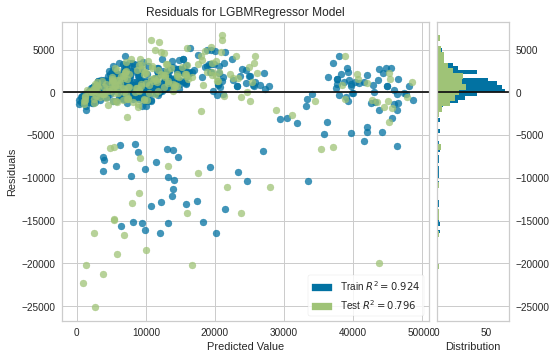

In [16]:
# Test set is automatically created by pycaret from the training set
rg.plot_model(tuned_rg)

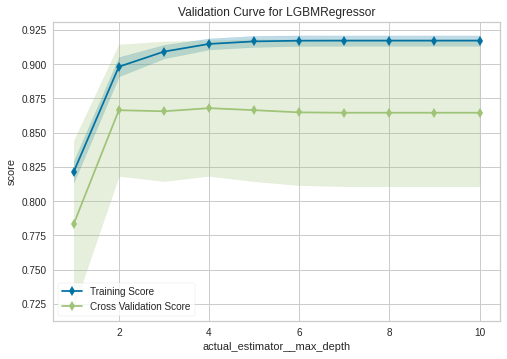

In [17]:
rg.plot_model(estimator = tuned_rg, plot = 'vc')

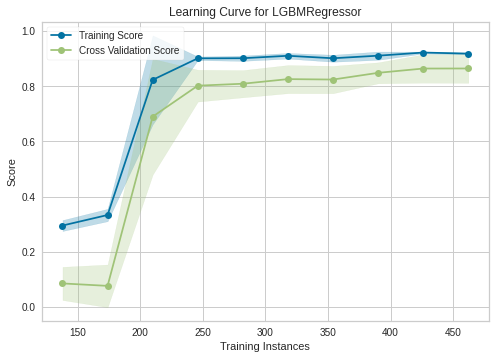

In [18]:
rg.plot_model(estimator = tuned_rg, plot = 'learning')

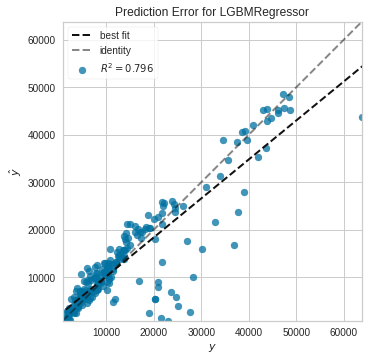

In [19]:
rg.plot_model(tuned_rg, plot = 'error')

C extension was not built during install!


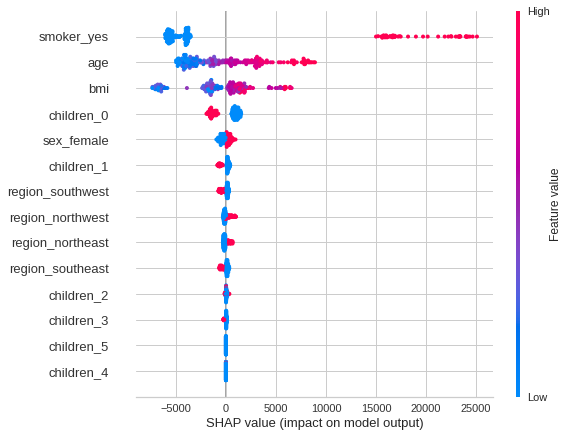

In [21]:
# Smoker is one of the most relevant variables 
interpretation = rg.interpret_model(tuned_rg)

In [22]:
rg.interpret_model(tuned_rg, plot = 'reason', observation = 5)

C extension was not built during install!


How I proposed in the brainstorming section, I would like to have a model that is able of identifying the origin of the data through the target and prediction variables, that is, if a data set comes from the testing set or the training set.

For that, what I am going to do is: first create a new dataset where I will store the target ```y``` and the predicted variable ```y_hat```; second, I will go column by column randomly shuffling its values and generating new predictive variables ```y_hat_feature_shuffled```, this is to explore the sensibility of predictions given the features; and finally, I will calculate the absolute difference between predictions ```y_hat```'s features and the target ```y```.

With this new dataset, I can create a classification model that allows me to identify the origin of the data. In principle, I must be unable to pre-discover the origin of the data, by doing it, implies that the data used by the model differ from the training and test set or that the model has a preference for the training data.

In [23]:
def generate_y_reg(df, origin, target, model):
    # Estimate preds
    preds =  rg.predict_model(model, data = df)
    # Create Diff
    df_preds = preds[[target,'Label']].rename(columns={target:'y','Label':'y_hat'})
    df_preds['diff'] = (df_preds['y']-df_preds['y_hat']).abs()
    # Loop on columns
    for col in tqdm(df.drop(columns=[target]).columns):
        # Shuffle
        df_temp = df.copy()
        df_temp[col] = df_temp[col].sample(frac=1).values
        # Calculate preds for shuffled column + diff and absolute values
        df_preds['y_hat_'+col] =  rg.predict_model(model, data = df_temp)['Label']
        df_preds['diff_'+col] = (df_preds['y']-df_preds['y_hat_'+col]).abs()
        
    # Define origin 1 for train 0 for test
    df_preds['origin'] = origin
    return df_preds

Now we have a dataset where the variable to predict is ```origin``` 1 for training set and 0 for the testing set. Also, to validate our model we have to create a training and testing set from the new dataset as usual.

In [24]:
df_train = generate_y_reg(df=train_data, origin=1, target=target, model=tuned_rg)
df_test = generate_y_reg(df=test_data, origin=0, target=target, model=tuned_rg)

df_train_train, df_train_test = train_test_split(df_train, test_size=.2)
df_test_train, df_test_test = train_test_split(df_test, test_size=.2)

df_set_train = df_train_train.append(df_test_train)
df_set_test = df_train_test.append(df_test_test)

100%|██████████| 6/6 [00:00<00:00,  7.83it/s]


In the beginning I chose the size of the test set close to 50% this to obtain a balanced class ```origin```, now. we can create a model with ```df_set_train```

In [25]:
df_set_train['origin'].mean(), df_set_test['origin'].mean()

(0.5495327102803739, 0.5485074626865671)

<AxesSubplot:xlabel='y', ylabel='diff'>

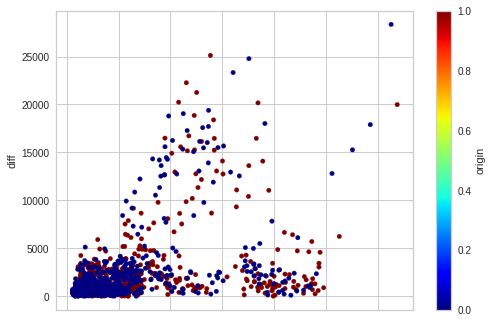

In [26]:
df_set_train.plot.scatter(x='y', y='diff', c='origin', colormap='jet')

Color is related to the origin of the data, we don't see to much difference between data from testing and training datasets

In [29]:
# Model to validate Overfitting
cl_setup = cl.setup(data = df_set_train, target = 'origin')
cl.set_config('seed', 100)

,Description,Value
0,session_id,1161
1,Target,origin
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1070, 16)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
best_overfit = cl.compare_models(['lr','rf','lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5573,0.5503,0.6580,0.5841,0.6176,0.0954,0.0971,0.0530
lightgbm,Light Gradient Boosting Machine,0.5440,0.5468,0.6312,0.5771,0.6014,0.0703,0.0705,0.0150
lr,Logistic Regression,0.5320,0.5276,0.7196,0.5539,0.6255,0.0281,0.0298,0.0070


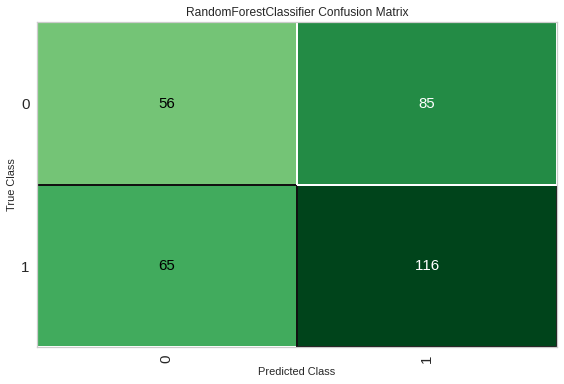

In [31]:
cl.plot_model(best_overfit, plot='confusion_matrix')

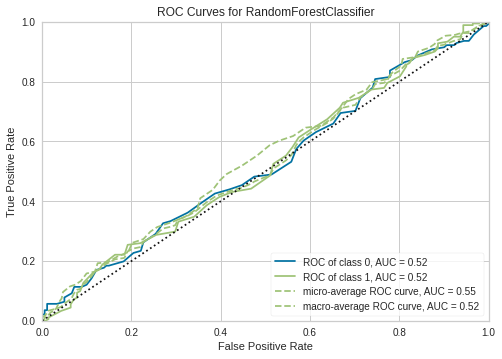

In [33]:
cl.plot_model(best_overfit, plot='auc')

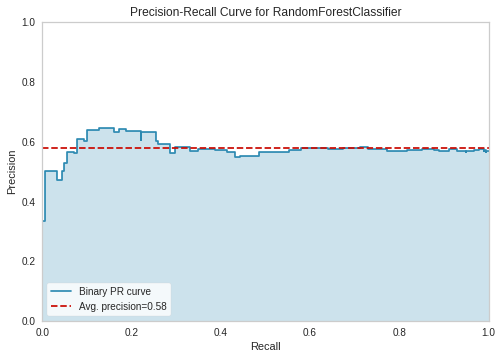

In [34]:
cl.plot_model(best_overfit, plot='pr')

Well, it seems that in principle our model does not present a overfitting problem, given our assumption, this can also be interpreted from the training curves at the beginning of the model.

Let's try more cases!!!!

In [37]:
# Boston dataset have less data
dataset = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [48]:
train_data, test_data = train_test_split(dataset, test_size=.45, random_state=100)
target = 'medv'
dataset.shape, train_data.shape, test_data.shape

((506, 14), (278, 14), (228, 14))

In [49]:
reg_setup = rg.setup(data = train_data, target=target, verbose=False)
rg.set_config('seed', 100)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
crim,Numeric
zn,Numeric
indus,Numeric
chas,Categorical
nox,Numeric
rm,Numeric
age,Numeric
dis,Numeric
rad,Categorical
tax,Numeric


In [50]:
rg.compare_models(['lr','gbr','rf','br','dt','lasso','ridge','knn','lightgbm','ada'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1770,10.1407,2.9225,0.8092,0.1380,0.1117,0.0120
rf,Random Forest Regressor,2.3690,11.9163,3.2142,0.7806,0.1434,0.1192,0.0380
ada,AdaBoost Regressor,2.4698,11.9054,3.2319,0.7773,0.1558,0.1322,0.0130
lightgbm,Light Gradient Boosting Machine,2.8146,15.5307,3.7947,0.7261,0.1656,0.1387,0.0070
ridge,Ridge Regression,3.1923,20.6534,4.3978,0.6727,0.2560,0.1641,0.0040
br,Bayesian Ridge,3.2052,20.3821,4.3894,0.6675,0.2664,0.1650,0.0040
lr,Linear Regression,3.2539,21.2178,4.4571,0.6653,0.2547,0.1665,0.0040
knn,K Neighbors Regressor,3.7600,27.9791,4.9803,0.6065,0.2120,0.1888,0.0060
lasso,Lasso Regression,3.5560,24.1626,4.8344,0.5998,0.2575,0.1740,0.0050
dt,Decision Tree Regressor,3.1942,22.3870,4.4820,0.5441,0.1869,0.1540,0.0040


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1327, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
model_rg = rg.create_model('gbr')
tuned_rg = rg.tune_model(model_rg, optimize = 'R2', n_iter = 50) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7949,4.6934,2.1664,0.9163,0.1028,0.0853
1,2.8268,18.1944,4.2655,0.6231,0.1460,0.1110
2,1.0571,1.8261,1.3513,0.9726,0.0846,0.0611
3,1.8651,7.2311,2.6891,0.6439,0.1284,0.1045
4,1.6969,4.6075,2.1465,0.9080,0.1080,0.0934
5,2.0652,5.9986,2.4492,0.8964,0.1297,0.1107
6,2.0524,8.6267,2.9371,0.8996,0.1331,0.1050
7,2.7111,12.7145,3.5657,0.8668,0.1881,0.1517
8,2.3437,8.0648,2.8399,0.9316,0.1109,0.1032
9,1.8353,5.3496,2.3129,0.9135,0.1432,0.1144


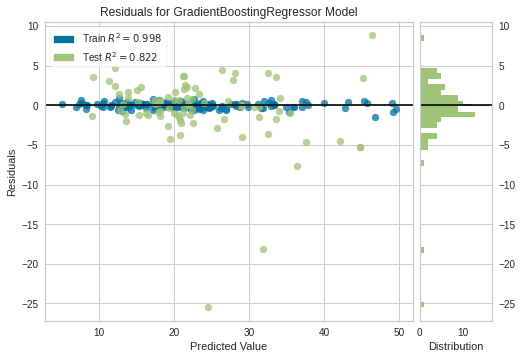

In [53]:
rg.plot_model(tuned_rg)

The residuals plot shows that testing data behaves very different

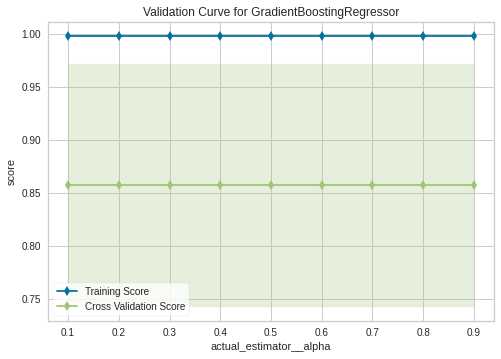

In [54]:
rg.plot_model(estimator = tuned_rg, plot = 'vc')

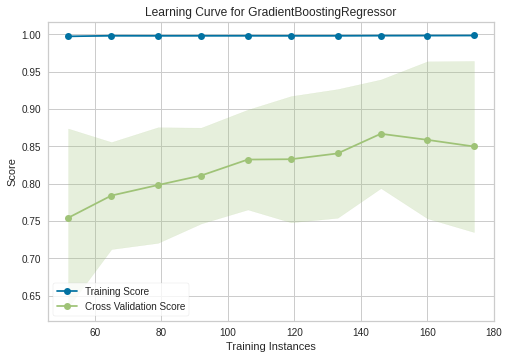

In [55]:
rg.plot_model(estimator = tuned_rg, plot = 'learning')

Training close to 100%??? YESS!!!!!! This is an overfitting case!

As in the previous case, we will try to create a model that allows us to differentiate the training data from the test data

In [56]:
df_train = generate_y_reg(df=train_data, origin=1, target=target, model=tuned_rg)
df_test = generate_y_reg(df=test_data, origin=0, target=target, model=tuned_rg)

df_train_train, df_train_test = train_test_split(df_train, test_size=.2)
df_test_train, df_test_test = train_test_split(df_test, test_size=.2)

df_set_train = df_train_train.append(df_test_train)
df_set_test = df_train_test.append(df_test_test)

df_set_train['origin'].mean(), df_set_test['origin'].mean()

100%|██████████| 13/13 [00:01<00:00,  9.33it/s]


(0.5495049504950495, 0.5490196078431373)

<AxesSubplot:xlabel='y', ylabel='diff'>

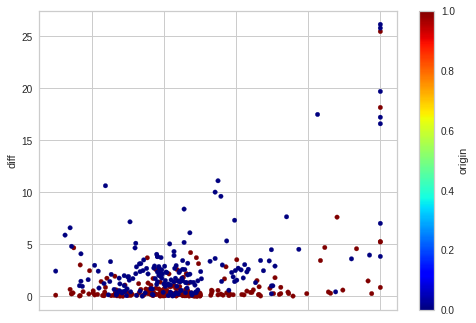

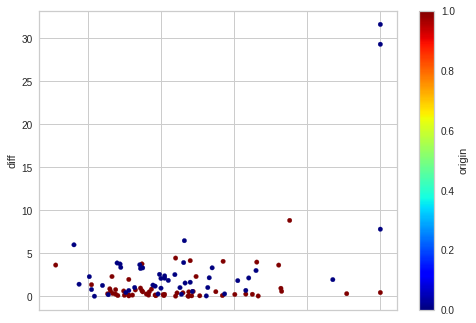

In [58]:
# Color is related to the origin of the data
df_set_train.plot.scatter(x='y', y='diff', c='origin', colormap='jet')
df_set_test.plot.scatter(x='y', y='diff', c='origin', colormap='jet')

In [59]:
# Model to validate Overfitting
cl_setup = cl.setup(data = df_set_train, target = 'origin', verbose=False, train_size = 0.60)
cl.set_config('seed', 100)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
y,Numeric
y_hat,Numeric
diff,Numeric
y_hat_crim,Numeric
diff_crim,Numeric
y_hat_zn,Numeric
diff_zn,Numeric
y_hat_indus,Numeric
diff_indus,Numeric
y_hat_chas,Numeric


In [60]:
best_overfit = cl.compare_models(['lr','rf','lightgbm','gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7725,0.7885,0.7907,0.8012,0.7935,0.5398,0.5440,0.0220
rf,Random Forest Classifier,0.7642,0.8057,0.7912,0.7889,0.7874,0.5225,0.5269,0.0420
lightgbm,Light Gradient Boosting Machine,0.7188,0.7821,0.7621,0.7517,0.7498,0.4297,0.4409,0.0070
lr,Logistic Regression,0.6900,0.7173,0.8060,0.6943,0.7425,0.3599,0.3723,0.0130


In [66]:
tuned_cl = cl.tune_model(cl.create_model('gbc'), n_iter = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9200,0.8864,0.8571,1.0000,0.9231,0.8408,0.8516
1,0.7600,0.7403,0.7857,0.7857,0.7857,0.5130,0.5130
2,0.7917,0.9091,0.8462,0.7857,0.8148,0.5775,0.5795
3,0.7500,0.8007,0.6923,0.8182,0.7500,0.5034,0.5105
4,0.7500,0.8112,0.7692,0.7692,0.7692,0.4965,0.4965
5,0.7500,0.7483,0.8462,0.7333,0.7857,0.4894,0.4966
6,0.6667,0.7692,0.7692,0.6667,0.7143,0.3191,0.3239
7,0.7917,0.8252,0.8462,0.7857,0.8148,0.5775,0.5795
8,0.7917,0.7643,0.7143,0.9091,0.8000,0.5890,0.6078
9,0.8333,0.8643,0.8571,0.8571,0.8571,0.6571,0.6571


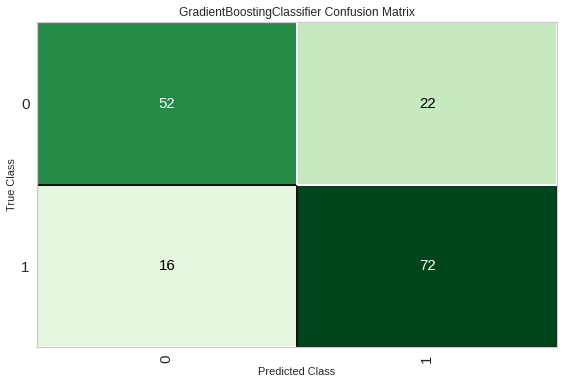

In [67]:
cl.plot_model(tuned_cl, plot='confusion_matrix')

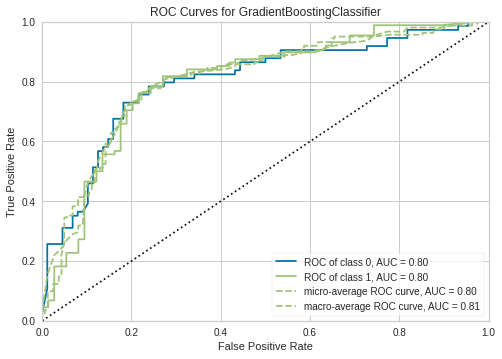

In [68]:
cl.plot_model(tuned_cl, plot='auc')

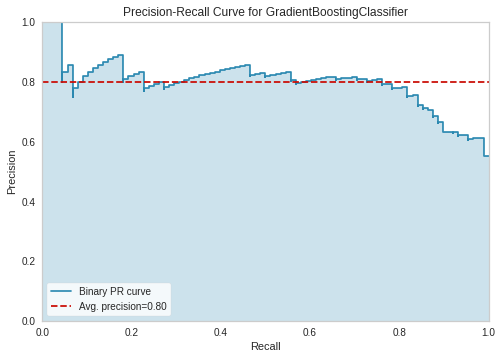

In [69]:
cl.plot_model(tuned_cl, plot='pr')

In [70]:
preds = cl.predict_model(tuned_cl, data=df_set_test)
print(classification_report( preds['origin'],  preds['Label']))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72        46
           1       0.77      0.73      0.75        56

    accuracy                           0.74       102
   macro avg       0.73      0.74      0.73       102
weighted avg       0.74      0.74      0.74       102



Well, it seems that it works, so it is possible to create a classification model over the results of the model using only target and predictive variables.

In [72]:
for col in train_data.columns:
    print('Column: {} --- Test: {}'.format(col,
          ks_2samp(train_data[col], test_data[col])))

Column: crim --- Test: KstestResult(statistic=0.08756152972358955, pvalue=0.2710425163125244)
Column: zn --- Test: KstestResult(statistic=0.042944591695065, pvalue=0.9644879508711838)
Column: indus --- Test: KstestResult(statistic=0.046604821406033066, pvalue=0.9323467173899109)
Column: chas --- Test: KstestResult(statistic=0.006152972358954941, pvalue=1.0)
Column: nox --- Test: KstestResult(statistic=0.06544238293575666, pvalue=0.6250439558968421)
Column: rm --- Test: KstestResult(statistic=0.09024359459800581, pvalue=0.24014273924707574)
Column: age --- Test: KstestResult(statistic=0.06421178846396566, pvalue=0.6482702307071222)
Column: dis --- Test: KstestResult(statistic=0.05689132904202954, pvalue=0.7836391171212401)
Column: rad --- Test: KstestResult(statistic=0.029597374731793514, pvalue=0.999707808245971)
Column: tax --- Test: KstestResult(statistic=0.05168496781522151, pvalue=0.8681383377604295)
Column: ptratio --- Test: KstestResult(statistic=0.046510160292818375, pvalue=0.93

We cannot reject the null hypothesis since the p-value is higher than 5%, so we can not assume, for some variables, that the data come from different sets. So, possibly the model should be the overfitting cause.

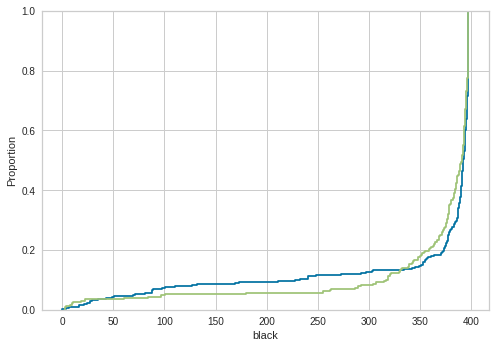

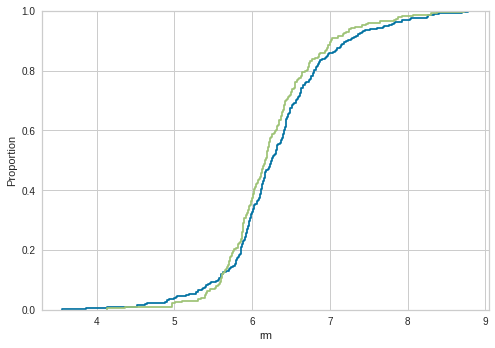

In [77]:
# Example of cdf distributions with the lowest p-values
for col in ['black','rm']:
    sns.ecdfplot(train_data[col])
    sns.ecdfplot(test_data[col])
    plt.show()

The variable ```black``` distribution on test and train is different and can lead to overfitting during the model.

#### Lets try with a classifiaction problem

In [184]:
dataset = get_data('bank')
train_data, test_data = train_test_split(dataset, test_size=.45)
target = 'deposit'

dataset.shape, train_data.shape, test_data.shape

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


((45211, 17), (24866, 17), (20345, 17))

In [185]:
cl_setup = cl.setup(data = train_data, target=target, verbose=False)
cl.set_config('seed', 100)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
job,Categorical
marital,Categorical
education,Categorical
default,Categorical
balance,Numeric
housing,Categorical
loan,Categorical
contact,Categorical
day,Numeric


In [186]:
cl.compare_models(['lr','gbc','rf','dt','knn','lightgbm','ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9053,0.9220,0.3856,0.6513,0.4836,0.4352,0.4538,0.3460
lightgbm,Light Gradient Boosting Machine,0.9038,0.9290,0.4486,0.6115,0.5164,0.4645,0.4719,0.0500
rf,Random Forest Classifier,0.9027,0.9218,0.3371,0.6470,0.4426,0.3952,0.4208,0.2840
lr,Logistic Regression,0.8997,0.8978,0.3157,0.6281,0.4198,0.3715,0.3981,0.6380
ada,Ada Boost Classifier,0.8986,0.9061,0.3551,0.6011,0.4457,0.3940,0.4110,0.1020
knn,K Neighbors Classifier,0.8786,0.7520,0.2278,0.4458,0.3008,0.2420,0.2587,0.0570
dt,Decision Tree Classifier,0.8737,0.6916,0.4550,0.4527,0.4534,0.3821,0.3824,0.0400


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4807, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [187]:
model_cl = cl.create_model('lightgbm')
tuned_cl = cl.tune_model(model_cl, n_iter = 25) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8972,0.9091,0.3950,0.5766,0.4688,0.4141,0.4232
1,0.9041,0.9317,0.4200,0.6222,0.5015,0.4506,0.4613
2,0.9052,0.9254,0.3800,0.6496,0.4795,0.4313,0.4501
3,0.9133,0.9330,0.4500,0.6870,0.5438,0.4982,0.5118
4,0.9110,0.9205,0.4627,0.6643,0.5455,0.4979,0.5079
5,0.9092,0.9276,0.4378,0.6617,0.5269,0.4790,0.4916
6,0.9023,0.9164,0.3650,0.6293,0.4620,0.4124,0.4310
7,0.9023,0.9190,0.3650,0.6293,0.4620,0.4124,0.4310
8,0.9017,0.9233,0.3850,0.6160,0.4738,0.4228,0.4370
9,0.9063,0.9266,0.4650,0.6242,0.5330,0.4821,0.4886


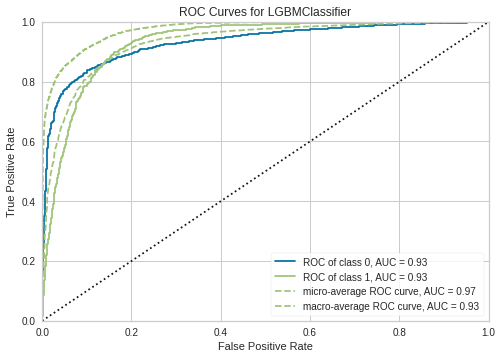

In [188]:
cl.plot_model(tuned_cl)

C extension was not built during install!


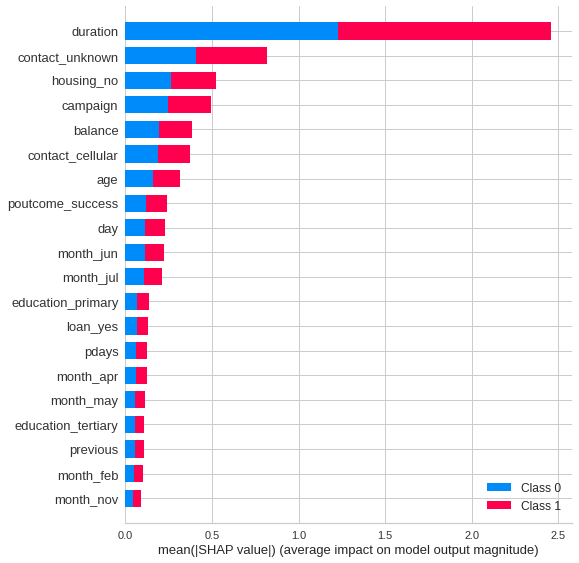

In [189]:
cl.interpret_model(tuned_cl)

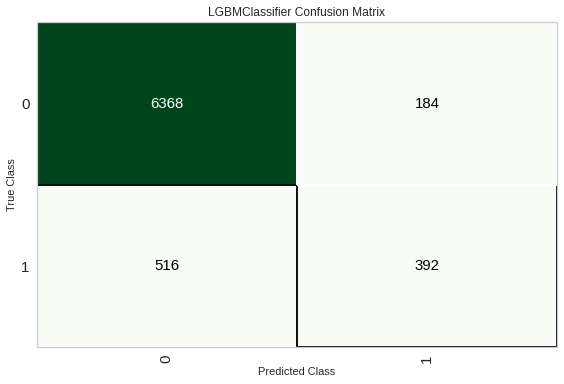

In [190]:
cl.plot_model(tuned_cl, plot = 'confusion_matrix')

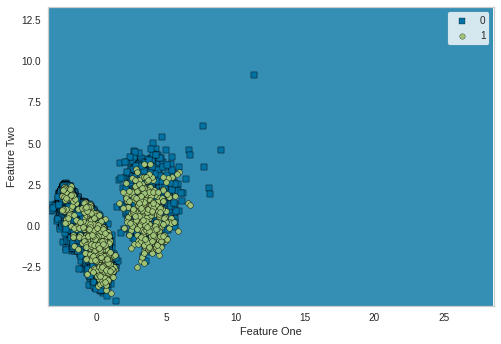

In [191]:
cl.plot_model(tuned_cl, plot = 'boundary')

Interpreting the decision boundary does not always provide too much information, so, let's use our model to see if we can detect any type of overfitting

In [192]:
# Classification requires some variation from the function "generate_y_reg"
def generate_y_class(df, origin, target, model):
    # Estimate preds
    preds =  cl.predict_model(model, data = df)
    # Create Diff
    df_preds = pd.get_dummies(preds[target], drop_first=True)
    df_preds['match'] = preds[target]==preds['Label']
    df_preds['score'] = preds['Score']
    
    # Loop on columns
    for col in tqdm(df.drop(columns=[target]).columns):
        # Shuffle
        df_temp = df.copy()
        df_temp[col] = df_temp[col].sample(frac=1).values
        # Calculate preds for shuffled column + diff and absolute values
        preds =  cl.predict_model(model, data = df_temp)
        df_preds['match_'+col] =  preds[target]==preds['Label']
        df_preds['score_'+col] = preds['Score']
        
    # Define origin 1 for train 0 for test
    df_preds['origin'] = origin
    return df_preds

In [193]:
df_train = generate_y_class(df=train_data, origin=1, target=target, model=tuned_cl)
df_test = generate_y_class(df=test_data, origin=0, target=target, model=tuned_cl)

df_train_train, df_train_test = train_test_split(df_train, test_size=.2)
df_test_train, df_test_test = train_test_split(df_test, test_size=.2)

df_set_train = df_train_train.append(df_test_train)
df_set_test = df_train_test.append(df_test_test)

100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


In [194]:
cl_setup = cl.setup(data = df_set_train, target = 'origin', verbose=False, train_size = 0.60)
cl.set_config('seed', 100)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
yes,
match,Categorical
score,Numeric
match_age,Categorical
score_age,Numeric
match_job,Categorical
score_job,Numeric
match_marital,Categorical
score_marital,Numeric
match_education,Categorical


In [195]:
best_overfit = cl.compare_models(['lr','rf','lightgbm','gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5457,0.5080,0.9726,0.5483,0.7013,0.0002,0.0017,0.1440
gbc,Gradient Boosting Classifier,0.5453,0.5048,0.9611,0.5487,0.6986,0.0018,0.0049,1.0290
lightgbm,Light Gradient Boosting Machine,0.5278,0.4954,0.8183,0.5464,0.6552,-0.0068,-0.0085,0.0790
rf,Random Forest Classifier,0.5182,0.4976,0.6792,0.5490,0.6072,0.0022,0.0023,0.8800


In [196]:
tuned_cl = cl.tune_model(cl.create_model('lr'), n_iter = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5424,0.5135,0.9689,0.5465,0.6988,-0.0061,-0.0168
1,0.5498,0.5271,0.9933,0.5493,0.7074,0.0060,0.0287
2,0.5447,0.5284,0.9815,0.5473,0.7028,-0.0046,-0.0164
3,0.5493,0.5153,0.9950,0.5492,0.7077,0.0034,0.0194
4,0.5502,0.5251,0.9891,0.5500,0.7069,0.0070,0.0274
5,0.5488,0.4811,0.9824,0.5496,0.7049,0.0052,0.0171
6,0.5442,0.5089,0.9815,0.5471,0.7026,-0.0057,-0.0206
7,0.5452,0.5045,0.9815,0.5476,0.7030,-0.0035,-0.0122
8,0.5442,0.5014,0.9840,0.5469,0.7031,-0.0063,-0.0250
9,0.5429,0.4988,0.9815,0.5463,0.7019,-0.0091,-0.0342


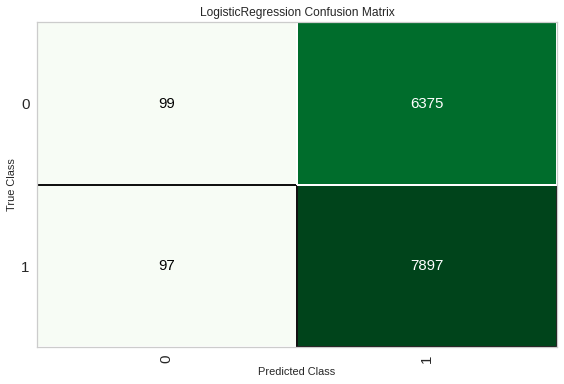

In [197]:
cl.plot_model(tuned_cl, plot='confusion_matrix')

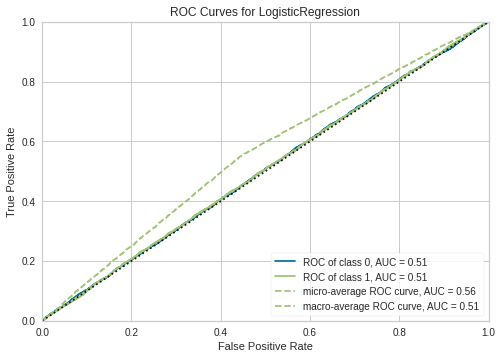

In [198]:
cl.plot_model(tuned_cl, plot='auc')

In [199]:
preds = cl.predict_model(tuned_cl, data=df_set_test)
print(classification_report(preds['origin'],  preds['Label']))

              precision    recall  f1-score   support

           0       0.52      0.02      0.04      4069
           1       0.55      0.99      0.71      4974

    accuracy                           0.55      9043
   macro avg       0.54      0.50      0.37      9043
weighted avg       0.54      0.55      0.40      9043



It seems the classifier has not presented an overfitting following our methodolgy, let's try one that has less data

In [24]:
dataset = get_data('diabetes')
train_data, test_data = train_test_split(dataset, test_size=.45)
target = 'Class variable'

dataset.shape, train_data.shape, test_data.shape

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


((768, 9), (422, 9), (346, 9))

In [25]:
cl_setup = cl.setup(data = train_data, target=target, verbose=False)
cl.set_config('seed', 100)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Number of times pregnant,Categorical
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Numeric
Diastolic blood pressure (mm Hg),Numeric
Triceps skin fold thickness (mm),Numeric
2-Hour serum insulin (mu U/ml),Numeric
Body mass index (weight in kg/(height in m)^2),Numeric
Diabetes pedigree function,Numeric
Age (years),Numeric
Class variable,Label


In [26]:
cl.compare_models(['lr','gbc','rf','dt','knn','lightgbm','ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8101,0.8513,0.6833,0.6956,0.6855,0.5502,0.5534,0.0140
ada,Ada Boost Classifier,0.8000,0.8338,0.6156,0.7053,0.6494,0.5123,0.5201,0.0140
rf,Random Forest Classifier,0.7899,0.8397,0.5722,0.6829,0.6155,0.4759,0.4831,0.0430
lightgbm,Light Gradient Boosting Machine,0.7767,0.8432,0.6044,0.6506,0.6206,0.4643,0.4688,0.0050
lr,Logistic Regression,0.7698,0.7978,0.4944,0.6667,0.5630,0.4132,0.4235,0.0260
dt,Decision Tree Classifier,0.7601,0.7198,0.6156,0.6067,0.6103,0.4370,0.4376,0.0030
knn,K Neighbors Classifier,0.7320,0.7700,0.5533,0.5550,0.5484,0.3613,0.3640,0.0060


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5468, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [27]:
model_cl = cl.create_model('gbc')
tuned_cl = cl.tune_model(model_cl, n_iter = 25) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.8700,0.8000,0.7273,0.7619,0.6341,0.6359
1,0.7333,0.8571,0.6667,0.5455,0.6000,0.4030,0.4076
2,0.7333,0.8307,0.4444,0.5714,0.5000,0.3220,0.3268
3,0.9667,0.9894,0.8889,1.0000,0.9412,0.9180,0.9211
4,0.7667,0.7884,0.4444,0.6667,0.5333,0.3860,0.4001
5,0.7586,0.8222,0.5556,0.6250,0.5882,0.4183,0.4198
6,0.9310,0.9667,0.7778,1.0000,0.8750,0.8284,0.8409
7,0.6897,0.7111,0.4444,0.5000,0.4706,0.2521,0.2530
8,0.8966,0.8778,0.7778,0.8750,0.8235,0.7507,0.7533
9,0.9310,0.9389,0.8889,0.8889,0.8889,0.8389,0.8389


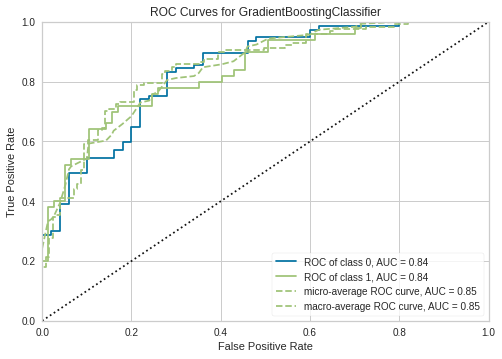

In [28]:
cl.plot_model(tuned_cl)

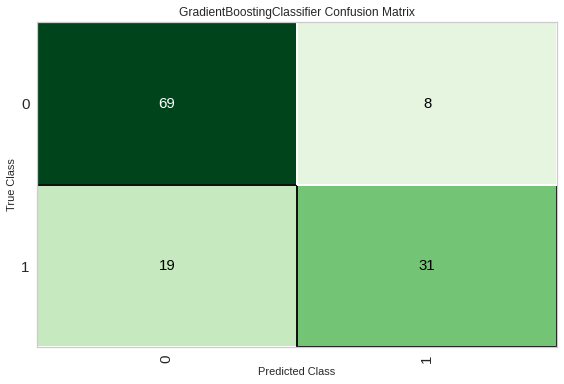

In [29]:
cl.plot_model(tuned_cl, plot = 'confusion_matrix')

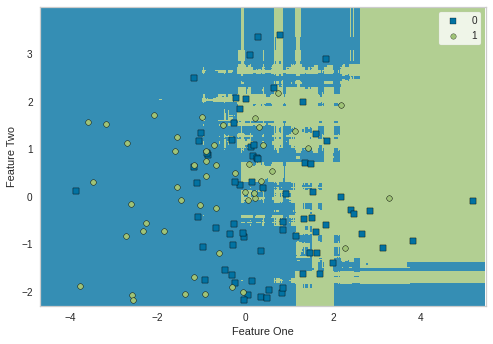

In [30]:
cl.plot_model(tuned_cl, plot = 'boundary')

Let's train a model to look for overfitting

In [33]:
df_train = generate_y_class(df=train_data, origin=1, target=target, model=tuned_cl)
df_test = generate_y_class(df=test_data, origin=0, target=target, model=tuned_cl)

df_train_train, df_train_test = train_test_split(df_train, test_size=.2)
df_test_train, df_test_test = train_test_split(df_test, test_size=.2)

df_set_train = df_train_train.append(df_test_train)
df_set_test = df_train_test.append(df_test_test)

100%|██████████| 8/8 [00:00<00:00,  8.03it/s]


In [34]:
cl_setup = cl.setup(data = df_set_train, target = 'origin', verbose=False, train_size = 0.60)
cl.set_config('seed', 100)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
1,
match,Categorical
score,Numeric
match_Number of times pregnant,Categorical
score_Number of times pregnant,Numeric
match_Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Categorical
score_Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Numeric
match_Diastolic blood pressure (mm Hg),Categorical
score_Diastolic blood pressure (mm Hg),Numeric
match_Triceps skin fold thickness (mm),Categorical


In [35]:
best_overfit = cl.compare_models(['lr','rf','lightgbm','gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6404,0.6070,0.8867,0.6248,0.7321,0.2310,0.2701,0.0040
lightgbm,Light Gradient Boosting Machine,0.5583,0.5401,0.6355,0.5949,0.6135,0.0964,0.0975,0.0070
rf,Random Forest Classifier,0.5503,0.5433,0.6548,0.5816,0.6144,0.0751,0.0775,0.0440
gbc,Gradient Boosting Classifier,0.5397,0.5403,0.6410,0.5755,0.6052,0.0545,0.0559,0.0180


In [40]:
tuned_cl = cl.tune_model(cl.create_model('lr'), n_iter = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6216,0.5179,0.9048,0.6129,0.7308,0.1672,0.2080
1,0.6216,0.5863,0.9048,0.6129,0.7308,0.1672,0.2080
2,0.7027,0.6399,0.8571,0.6923,0.7660,0.3709,0.3871
3,0.6757,0.7530,0.8571,0.6667,0.7500,0.3084,0.3287
4,0.5946,0.5559,0.8500,0.5862,0.6939,0.1501,0.1745
5,0.5946,0.5971,0.8000,0.5926,0.6809,0.1578,0.1716
6,0.6757,0.6794,0.9000,0.6429,0.7500,0.3232,0.3621
7,0.6667,0.6094,0.8000,0.6667,0.7273,0.3077,0.3162
8,0.6944,0.5531,0.9500,0.6552,0.7755,0.3444,0.4080
9,0.6667,0.7031,0.9000,0.6429,0.7500,0.2895,0.3287


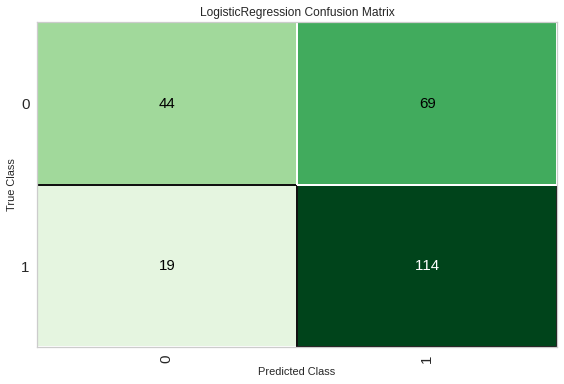

In [41]:
cl.plot_model(tuned_cl, plot='confusion_matrix')

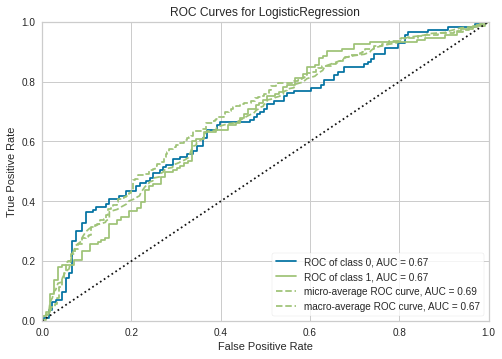

In [42]:
cl.plot_model(tuned_cl, plot='auc')

In [43]:
preds = cl.predict_model(tuned_cl, data=df_set_test)
print(classification_report(preds['origin'],  preds['Label']))

              precision    recall  f1-score   support

           0       0.66      0.30      0.41        70
           1       0.60      0.87      0.71        85

    accuracy                           0.61       155
   macro avg       0.63      0.59      0.56       155
weighted avg       0.63      0.61      0.58       155



As expected, models with few data tend to have a high probability of overfit as it happens in this last model.
Let me also highlight that the decision boundary is extremely complex!

In [46]:
for col in train_data.columns:
    print('Column: {} --- Test: {}'.format(col, ks_2samp(train_data[col], test_data[col])))

Column: Number of times pregnant --- Test: KstestResult(statistic=0.04824261019642221, pvalue=0.743378974019568)
Column: Plasma glucose concentration a 2 hours in an oral glucose tolerance test --- Test: KstestResult(statistic=0.0835136838068104, pvalue=0.13108301033117842)
Column: Diastolic blood pressure (mm Hg) --- Test: KstestResult(statistic=0.05592691011697669, pvalue=0.5662340299987394)
Column: Triceps skin fold thickness (mm) --- Test: KstestResult(statistic=0.04653042215708298, pvalue=0.7812192978857021)
Column: 2-Hour serum insulin (mu U/ml) --- Test: KstestResult(statistic=0.034257458291099364, pvalue=0.9713789652397455)
Column: Body mass index (weight in kg/(height in m)^2) --- Test: KstestResult(statistic=0.09612908528066186, pvalue=0.05471892960091773)
Column: Diabetes pedigree function --- Test: KstestResult(statistic=0.07407610333397255, pvalue=0.2324917354029702)
Column: Age (years) --- Test: KstestResult(statistic=0.07588417390351478, pvalue=0.20942888202504983)
Colum

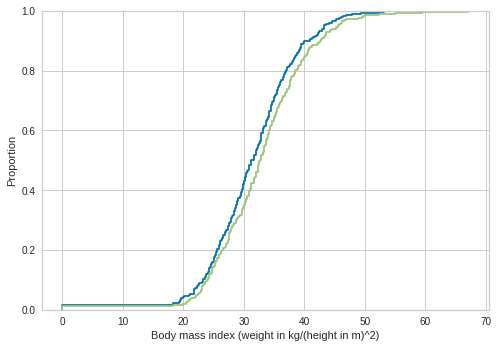

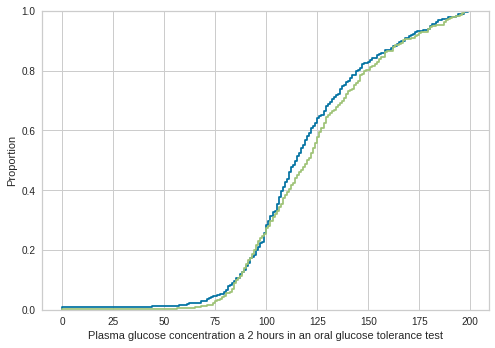

In [47]:
# Example of cdf distributions with the lowest p-values
for col in ['Body mass index (weight in kg/(height in m)^2)','Plasma glucose concentration a 2 hours in an oral glucose tolerance test']:
    sns.ecdfplot(train_data[col])
    sns.ecdfplot(test_data[col])
    plt.show()

### 4. How validate that approach solves the problem? And, How to assure the robustness of the approach?

As proof of concept, I recognize that our algorithm to identify overfitting seems to work, however, as several Machine Learning models this is a black box and to validate if it can really become a solution to the problem, we must give an interpretation to the results.

Identifying the origin of overfitting is not intuitive at all, since it has multiple origins, as mentioned in the brainstorming. In that sense, my best idea is to perform multiple automated analyzes that are capable of simulating the conditions in which the overfitting occurs.In this solution only I tackled some of the ideas proposed on the brainstorming.

A validation process for our algorithm should begin with assuring the quality of the data followed by assuring the quality of the model.

As in any ML and DL models, precision increases and overfitting decreases whenever there is more data, so to ensure the robustness of our solution we must consider multiple examples, as inputs variables we can use multiple datasets, nowadays it is easy to find them:

    * https://paperswithcode.com/
    * https://www.kaggle.com/
    * https://github.com/
    * https://archive.ics.uci.edu/ml/datasets.php
    * Snitch clients datasets, etc......

On these data that models could be generated automatically, automl, as we did in past examples and each of these models should be tested to validate the efficiency of our methodology, surely there is a way to do this automatically with some hours of coding.

### 5. Improvements and its implementation, how the results of the implementation would be displayed to end-users?

The improvements must be built iteratively, i.e., to go from a proof of concept to a minimum viable product, the first thing I would think would be to validate the quality of the dataset that was used during the model training. Something similar to what I did with the Kolmogórov-Smirnov test hypothesis. 

Ideally, I would like to enlarge my list of possible brainstorming causes and sort them by two criteria: the ease of prototype development and the impact on the precision of a model that is able to identify overfitting. So, once these ratings are given to all elements of the list we would obtain the order in which we could execute our improvement planning. I consider that there are multiple ways to approach the problem of overfitting, I always recommend starting with the simplest and building increasingly complex models.

Now, how can this model be implemented? Well, I imagine a cloud service, in which the model and training and testing data can be loaded, as an output we can generate a report explaning disadvantages and advantages of the model and data quality. A report in principle a can be a self-generated PDF, a registry on database that can be read trough an API or a complex dashboard.

### 6. Guiding users about how to improve their models (Recommendations)

From the results and interpretations of the multiple models, we can create a model that is able to make recommendations, it can be a model based on natural language using transformers as GPT or Bert, in which, once the information on the disadvantages and advantages of several tested models are collected, it will be able to inform the users about: how to improve the quality of their data; data leakage; that a model needs to be regularized; inform that the data represents real scenarios and the model's solutions continue to be valid in some cases; or, it is even possible to recommend another type of model architecture to obtain better results.

Thank you!!